In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

You may work with a partner on this homework and submit your assignment as a group. Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

### Final Recall = 0.3034 and Final F1 Score = 0.4016
</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), "code"))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
import time
import shap
%matplotlib inline
pd.set_option("display.max_colwidth", 400)

from IPython.display import Image
pd.set_option("display.max_colwidth", 200)

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

We're going to choose option 1, the classification problem. The goal is to predict whether a credit card client will default on their payment next month. The dataset contains demographic information (age, sex, marital status, education), financial details (credit limit, bill amounts, payment history), and past repayment statuses.

One of the key challenges in this problem is handling potential class imbalance. The number of non-defaulters is significantly higher than defaulters. Feature engineering will be crucial, especially in interpreting categorical variables like education and marriage, which may need encoding or reclassification. Additionally, the "PAY_X" features indicate repayment status over time, which could provide valuable behavioral insights (history of late payments).

To build a robust predictive model, I'll start with exploratory data analysis (EDA) to identify missing values, outliers, and correlations between features. Feature selection will also be important to prevent multicollinearity, particularly with bill amounts and payment history. Finally, evaluating different classification models (such as logistic regression, decision trees, and ensemble methods) will help determine the best approach for predicting defaults.

In [3]:
df = pd.read_csv("./data/UCI_Credit_Card.csv", index_col=0)
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   
5     50000.0    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
5       0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                            
1        0.0       0.0       0.0                           1  
2     1000.0       0.0    2000.0                           1  
3     1000.0    1000.0    5000.0                           0  
4     1100.0    1069.0    1000.0                           0  
5     9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X = df.drop(columns=['default.payment.next.month']) 
y = df['default.payment.next.month'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
X_train.describe(include = "all")

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    167880.651429      1.600762      1.852143      1.554000     35.500810   
std     130202.682167      0.489753      0.792961      0.521675      9.212644   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.015429     -0.137095     -0.171619     -0.225238     -0.264429   
std        1.120465      1.194506      1.196123      1.168556      1.137205   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...   21000.000000   21000.000000   21000.000000   21000.000000   
mean   ...   47010.414095   43486.610905   40428.518333   38767.202667   
std    ...   69035.759516   64843.303993   61187.200817   59587.689549   
min    ... -157264.000000  -50616.000000  -61372.000000 -339603.000000   
25%    ...    2663.750000    2293.750000    1739.500000    1215.750000   
50%    ...   20088.500000   19102.500000   18083.000000   16854.500000   
75%    ...   59895.000000   54763.250000   50491.000000   49253.750000   
max    ...  855086.000000  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   21000.000000  2.100000e+04   21000.000000   21000.000000   
mean     5673.585143  5.895027e+03    5311.432286    4774.021381   
std     17033.241454  2.180143e+04   18377.997079   15434.136142   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  8.200000e+02     390.000000     266.000000   
50%      2100.000000  2.007000e+03    1809.500000    1500.000000   
75%      5007.250000  5.000000e+03    4628.500000    4021.250000   
max    873552.000000  1.227082e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   21000.000000   21000.000000  
mean     4751.850095    5237.762190  
std     15228.193125   18116.846563  
min         0.000000       0.000000  
25%       234.000000     110.750000  
50%      1500.000000    1500.000000  
75%      4016.000000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 23 columns]

The dataset consists of 21,000 credit card clients with demographic details, credit limits, repayment history, and bill/payment amounts. There is high variability in financial attributes, with some extreme values, suggesting potential data scaling needs. Payment history shows that most users pay on time, but some experience significant delays.

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  21000 non-null  float64
 1   SEX        21000 non-null  int64  
 2   EDUCATION  21000 non-null  int64  
 3   MARRIAGE   21000 non-null  int64  
 4   AGE        21000 non-null  int64  
 5   PAY_0      21000 non-null  int64  
 6   PAY_2      21000 non-null  int64  
 7   PAY_3      21000 non-null  int64  
 8   PAY_4      21000 non-null  int64  
 9   PAY_5      21000 non-null  int64  
 10  PAY_6      21000 non-null  int64  
 11  BILL_AMT1  21000 non-null  float64
 12  BILL_AMT2  21000 non-null  float64
 13  BILL_AMT3  21000 non-null  float64
 14  BILL_AMT4  21000 non-null  float64
 15  BILL_AMT5  21000 non-null  float64
 16  BILL_AMT6  21000 non-null  float64
 17  PAY_AMT1   21000 non-null  float64
 18  PAY_AMT2   21000 non-null  float64
 19  PAY_AMT3   21000 non-null  float64
 20  PAY_AMT

The dataset contains 21,000 entries with 23 columns, all of which are fully populated with no missing values. It includes categorical variables like SEX, EDUCATION, and MARRIAGE, as well as numerical features such as credit limits, billing amounts, and payment history. The presence of both integer and float data types suggests the need for appropriate scaling and encoding for further analysis. The main takeaway from this table is that we are lucky to not see any null entries which we'd have to replace or remove.

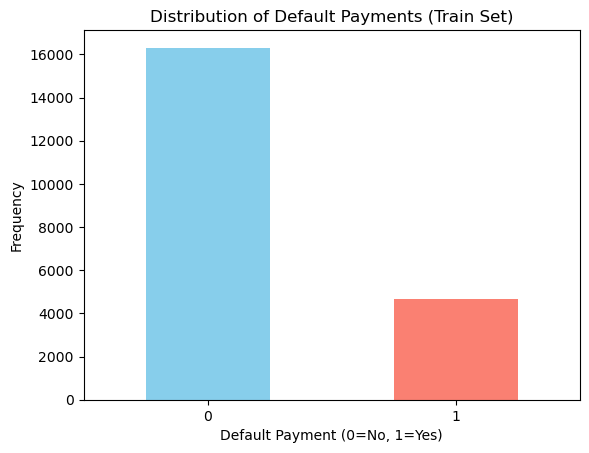

In [7]:
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Default Payments (Train Set)')
plt.xlabel('Default Payment (0=No, 1=Yes)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The bar graph reveals a significant class imbalance in the dataset, with 16,000 instances of non-default payments compared to 5,000 instances of default payments. This imbalance suggests that without proper handling, a model trained on this data might be biased toward predicting non-default cases more frequently, potentially leading to poor performance in identifying actual defaults.

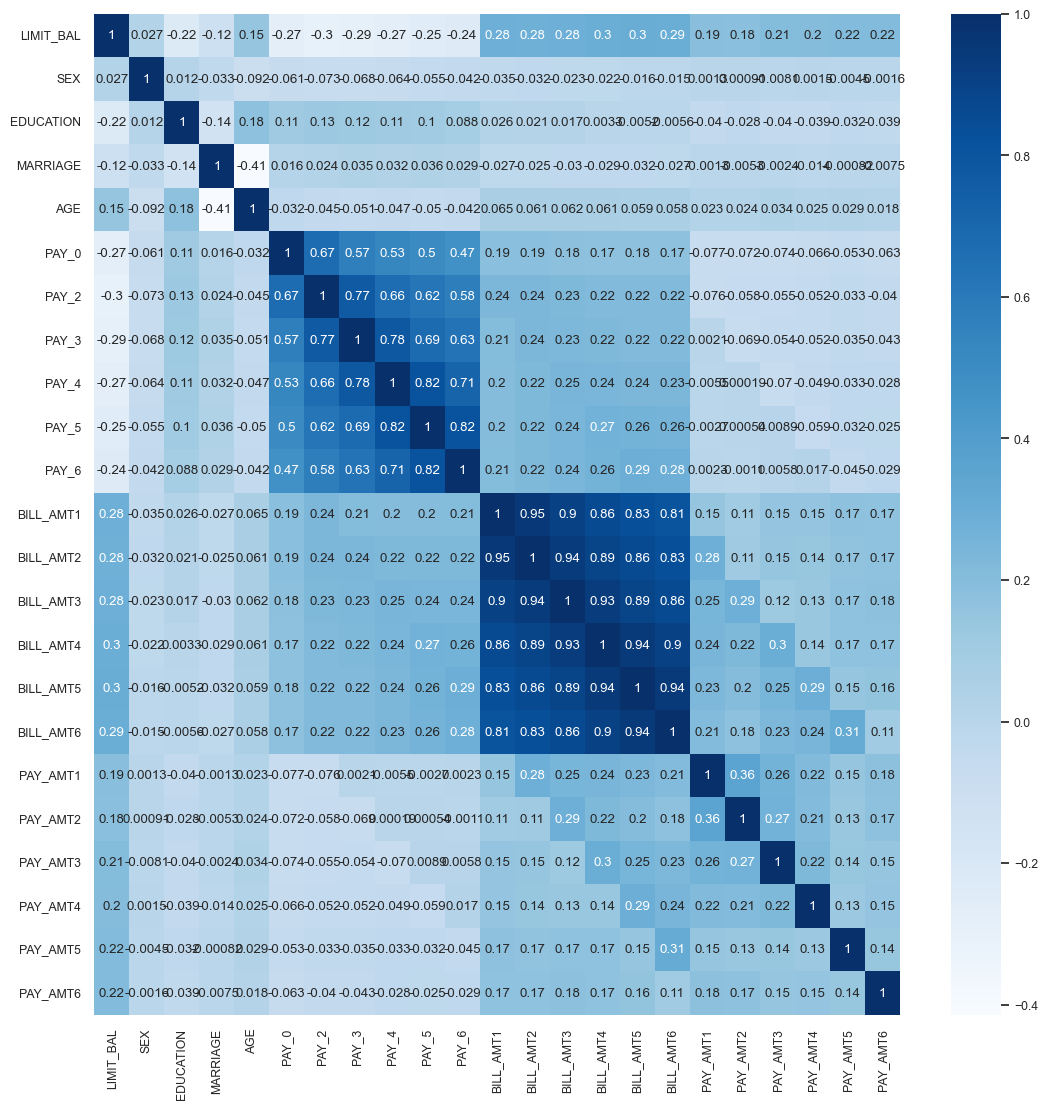

In [8]:
matrix = X_train.corr()
plt.figure(figsize=(13, 13))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, cmap=plt.cm.Blues);


This visualization is a correlation heatmap which we can use to detect correlations between the variables in our training set. For example, we can see that there's a high correlation between the Bill Amounts, showing how users usually have similar payment amounts across the 6 given in the dataset.

### Exploratory Data Analysis (EDA) Summary  

#### 1. Class Imbalance  
One of the key insights from the bar graph is the presence of a large class imbalance in the dataset, with 16,000 instances of non-default payments and 5,000 instances of default payments. This imbalance is crucial to consider because standard machine learning models trained on such data may become biased toward predicting the majority class (non-default). As a result, the model might exhibit high accuracy overall but fail to correctly identify defaults, which is the primary concern. How this affects modeling? We'll use metrics such as precision, recall, and F1-score rather than accuracy alone to assess performance.

#### 2. Correlation Heatmap Insights  
The correlation heatmap provides insight into the relationships between features. One notable trend is the high correlation among bill amounts (BILL_AMT1 through BILL_AMT6), indicating that customers tend to have consistent bill amounts across different months. This suggests some redundancy in the dataset—highly correlated features might not provide new information for the model. Additionally, if two variables are strongly correlated, multicollinearity can affect certain models (like linear regression).  

How this affects preprocessing and modeling:  
- Consider dimensionality reduction techniques (e.g., PCA) if multicollinearity becomes an issue.  
- Feature selection might be necessary to remove redundant variables that don't add much predictive power.  
- Normalization or standardization could improve model performance, especially for algorithms sensitive to feature scaling (e.g., logistic regression, SVM).  

#### 3. Summary Statistics and Data Characteristics  
From the dataset summary, we can observe:  
- Limit Balance (LIMIT_BAL) varies widely, with a mean of 167,880 and a standard deviation of 130,202, indicating that credit limits vary significantly across customers.  
- Age distribution ranges from 21 to 79 years, with a median of 34 years, suggesting that most customers are young to middle-aged adults.  
- Education and Marriage categories contain values outside expected ranges (e.g., EDUCATION has values up to 6, while predefined categories typically range from 1-3).  
- Repayment Status (PAY_0 to PAY_6) ranges from -2 to 8, where negative values indicate early payment, 0 means on-time payment, and positive values represent delays. The high standard deviation suggests diverse repayment behaviors.  
- Bill amounts (BILL_AMT1 to BILL_AMT6) and payment amounts (PAY_AMT1 to PAY_AMT6) show large variations, with some negative values that might indicate reporting errors or credit adjustments.  

How this affects preprocessing and modeling:  
- Data Cleaning: Investigate and handle unexpected values in EDUCATION and MARRIAGE to ensure meaningful categorization.  
- Feature Engineering: Transform repayment status into a more interpretable format (e.g., grouping severe delays together).  
- Scaling: Normalize highly varying features like LIMIT_BAL, BILL_AMT, and PAY_AMT to ensure consistent feature importance in models.  
- Handling Outliers: Some extreme values in bill amounts and payments might need to be clipped or transformed to prevent models from being overly influenced by a few large transactions.  

#### 4. Key Factors to Monitor in Model Training  
- Class imbalance mitigation to improve recall.  
- Feature selection to avoid redundant or highly correlated variables.  
- Appropriate evaluation metrics like AUC-ROC, F1-score, and Precision-Recall Curve rather than just accuracy.  
- Hyperparameter tuning for models that handle imbalanced data better.  
- Cross-validation strategies to ensure robust performance across different samples.  

### Conclusion  
This exploratory analysis provides critical insights that will shape data preprocessing and model selection. Handling class imbalance, redundant features, outliers, and categorical inconsistencies will be crucial before training a model. Additionally, selecting the right evaluation metrics will ensure the model is effective at predicting defaults rather than just achieving high accuracy.

### **Choice of Metrics**  

Since this is a binary classification problem with a significant class imbalance, standard accuracy isn't a reliable metric. Instead, we focus on:  

1. **Precision (Positive Predictive Value)**
   - Measures how many predicted defaults were actually defaults.

2. **Recall (Sensitivity/True Positive Rate)** 
   - Measures how many actual defaulters were correctly identified.   

3. **F1-Score (Harmonic Mean of Precision & Recall)**  
   - A balanced metric useful when both false positives and false negatives have significant consequences.  

4. **Precision-Recall Curve (AUC-PR)**  
   - Especially useful for imbalanced datasets, as it focuses on the minority class (default cases).  
   - Helps in fine-tuning the decision threshold based on business priorities.  

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

Since we see a correlation between Monthly delays and Bill amounts, we can average them out and create some new features to avoid collinearity and add to the depth of our model:  

1. **`AVG_PAY_AMT` (Average Monthly Payment)**  
   - This captures the user's typical payment behavior over time. Consistent high payments might indicate financial stability, while lower payments may hint at potential default risk.
   - We will use this to calculate `PAY_BILL_RATIO` and not in the actual training of our model to avoid collinearity

2. **`AVG_BILL_AMT` (Average Bill Amount)**  
   - Helps determine the usual debt burden of a customer. A consistently high bill amount could indicate higher financial strain, which may increase the risk of default.
   - We will use this to calculate `PAY_BILL_RATIO` and not in the actual training of our model to avoid collinearity
     
3. **`AVG_PAYMENT_DELAY` (Average Payment Delay)**  
   - Helps determine the usual delay from a customer. A consistently high delay amount (2-3 months) could indicate higher financial strain, which may increase the risk of default.
   - We will use this not because of any risk due to high correlation, but do reduce redundancy and unrequired complexity of the model.
     
4. **`PAY_BILL_RATIO` (Payment-to-Bill Ratio)**  
   - Shows the proportion of the bill being paid off each month. A low ratio could suggest financial difficulties, making it a strong predictor for default risk.  

5. **`CREDIT_USAGE_RATIO` (Debt-to-Limit Ratio)**  
   - Represents how much of the available credit is being used on average. High credit utilization is often linked to a higher probability of default, making this a crucial risk indicator.  

6. **`RESIDUAL_DEBT_RATIO` (Residual Debt after Payments)**  
   - Captures the remaining unpaid balance relative to the credit limit. A higher value suggests an accumulation of debt over time, which could be a warning sign for potential default.  


In [9]:
# Calculate Average Payment Amount
avg_pay = X_train[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)

# Calculate Average Bill Amount
avg_bill = X_train[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis=1)

X_train['AVG_PAYMENT_DELAY'] = X_train[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Payment-to-Bill Ratio (Mean Payment Ratio)
X_train["PAY_BILL_RATIO"] = avg_pay / avg_bill
X_train["PAY_BILL_RATIO"].fillna(0, inplace=True)  # Replace NaN values if any


# Debt-to-Limit Ratio (Credit Usage Score)
X_train["CREDIT_USAGE_RATIO"] = avg_bill / X_train["LIMIT_BAL"]

# Residual Debt Ratio
X_train["RESIDUAL_DEBT_RATIO"] = (avg_bill - avg_pay) / X_train["LIMIT_BAL"]

# Replace any NaN or infinite values resulting from division
X_train.replace([float("inf"), -float("inf")], 0, inplace=True)

X_train.head(5)


/var/folders/33/1wzsbpq91w77pm_f9cl7zk4c0000gn/T/ipykernel_53138/3064853693.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["PAY_BILL_RATIO"].fillna(0, inplace=True)  # Replace NaN values if any


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
16396   320000.0    2          1         2   36      0      0      0      0   
21449   440000.0    2          1         2   30     -1     -1     -1      0   
20035   160000.0    2          3         1   44     -2     -2     -2     -2   
25756   120000.0    2          2         1   30      0      0      0      0   
1439     50000.0    1          2         2   54      1      2      0      0   

       PAY_5  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID            ...                                                               
16396      0  ...    5000.0    5018.0    1000.0    3000.0       0.0    7013.0   
21449      0  ...     612.0   87426.0  130007.0    3018.0   15000.0   51663.0   
20035     -2  ...       0.0       0.0       0.0       0.0       0.0       0.0   
25756      0  ...    3706.0    5502.0    4204.0    3017.0    2005.0    1702.0   
1439       0  ...       0.0    1400.0    1200.0    1500.0    1000.0    1500.0   

       AVG_PAYMENT_DELAY  PAY_BILL_RATIO  CREDIT_USAGE_RATIO  \
ID                                                             
16396                0.0        0.176415            0.062090   
21449               -0.5        0.544084            0.200313   
20035               -2.0       -0.000000           -0.000112   
25756                0.0        0.037944            0.737058   
1439                 0.5        0.032182            0.683603   

       RESIDUAL_DEBT_RATIO  
ID                          
16396             0.051136  
21449             0.091326  
20035            -0.000112  
25756             0.709092  
1439              0.661603  

[5 rows x 27 columns]

In [10]:
#Doing the same for the test set

# Calculate Average Payment Amount
avg_pay = X_test[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)

# Calculate Average Bill Amount
avg_bill = X_test[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis=1)

X_test['AVG_PAYMENT_DELAY'] = X_test[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Payment-to-Bill Ratio (Mean Payment Ratio)
X_test["PAY_BILL_RATIO"] = avg_pay / avg_bill
X_test["PAY_BILL_RATIO"].fillna(0, inplace=True)  # Replace NaN values if any


# Debt-to-Limit Ratio (Credit Usage Score)
X_test["CREDIT_USAGE_RATIO"] = avg_bill / X_test["LIMIT_BAL"]

# Residual Debt Ratio
X_test["RESIDUAL_DEBT_RATIO"] = (avg_bill - avg_pay) / X_test["LIMIT_BAL"]

# Replace any NaN or infinite values resulting from division
X_test.replace([float("inf"), -float("inf")], 0, inplace=True)

X_test.head(5)

/var/folders/33/1wzsbpq91w77pm_f9cl7zk4c0000gn/T/ipykernel_53138/1716199109.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["PAY_BILL_RATIO"].fillna(0, inplace=True)  # Replace NaN values if any


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
25666    40000.0    2          2         2   26     -1      0      0      0   
16465    80000.0    2          3         1   59      0      0      0      0   
22387   170000.0    2          1         2   30      2      2      2      2   
10150   200000.0    2          2         1   41     -2     -2     -2     -2   
8730     50000.0    1          2         1   43      0      0      0      0   

       PAY_5  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID            ...                                                               
25666     -1  ...    1300.0    1000.0       0.0   22373.0     680.0   10000.0   
16465      0  ...    3212.0    2106.0    2000.0    1603.0    1903.0    2006.0   
22387      2  ...    6800.0    6500.0       0.0   13000.0    5500.0    1000.0   
10150     -2  ...     742.0       0.0       0.0       0.0       0.0       0.0   
8730       0  ...    1140.0    1150.0     331.0     341.0     356.0     330.0   

       AVG_PAYMENT_DELAY  PAY_BILL_RATIO  CREDIT_USAGE_RATIO  \
ID                                                             
25666          -0.333333        0.272569            0.540429   
16465           0.000000        0.036697            0.728377   
22387           2.000000        0.033717            0.953734   
10150          -2.000000        0.030529            0.020254   
8730            0.000000        0.068122            0.178503   

       RESIDUAL_DEBT_RATIO  
ID                          
25666             0.393125  
16465             0.701648  
22387             0.921577  
10150             0.019636  
8730              0.166343  

[5 rows x 27 columns]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

### 1. **Numerical Features**
These are features that represent continuous numerical values.
- **Examples**: `LIMIT_BAL`, `AGE`, `AVG_PAYMENT_DELAY`, `PAY_BILL_RATIO`, `CREDIT_USAGE_RATIO`, `RESIDUAL_DEBT_RATIO`
- **Scaling**: Will probably use the `StandardScaler`.

### 2. **Ordinal Features**
These features have a fixed order but no inherent numeric meaning.
- **Examples**: Only `EDUCATION` should have a ordered encoding and the dataset defines Education ordinally by default.
  
### 3. **Categorical Features (Nominal)**
These features have no inherent order and represent distinct categories.
- **Examples**: In the dataset, `SEX` and `MARRIAGE`, are categorical features. They come ordinally encoded so we will have to use a OneHotEncoder to fix this
- **Encoding**: `OneHotEncoder`
  
### 4. **Dropped Features**
These features are redundant and unnecessarily increase the complexity of the model. They would only contribute to collinearity with our Numerical Features.
- **Examples**: `BILL_AMT1` to `BILL_AMT6`, `PAY_AMT1` to `PAY_AMT6, PAY_0 AND PAY_2 - PAY_6`

In [11]:
numerical_features = [
    'LIMIT_BAL', 'AGE', 'AVG_PAYMENT_DELAY', 'PAY_BILL_RATIO', 
    'CREDIT_USAGE_RATIO', 'RESIDUAL_DEBT_RATIO'
]
ordinal_features = ['EDUCATION'] #not actual going to encode, but here for reference because it's already encoded
categorical_features = ['SEX', 'MARRIAGE']
drop_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 
                 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [12]:
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for ordinal features
'''
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('ordinal', OrdinalEncoder())  # Apply ordinal encoding
])'''

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        #('ord', ordinal_transformer, ordinal_features),
        ('pass','passthrough',ordinal_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop_columns', 'drop', drop_features)
    ], 
    remainder='drop'
)

In [14]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

We can use the Dummy Classifier for our baseline model

In [15]:
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [16]:
y_pred_dummy = dummy_model.predict(X_test)

In [17]:
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)
conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)

Dummy Classifier - Accuracy: 0.6578
Dummy Classifier - Precision: 0.2176
Dummy Classifier - Recall: 0.2238
Dummy Classifier - F1 Score: 0.2206


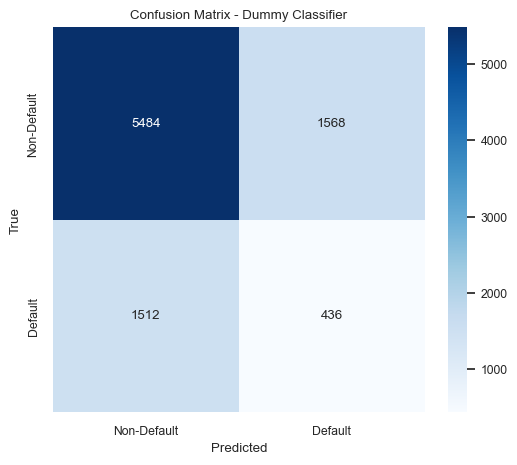

In [18]:
print("Dummy Classifier - Accuracy: {:.4f}".format(accuracy_dummy))
print("Dummy Classifier - Precision: {:.4f}".format(precision_dummy))
print("Dummy Classifier - Recall: {:.4f}".format(recall_dummy))
print("Dummy Classifier - F1 Score: {:.4f}".format(f1_dummy))

# Step 6: Plot the confusion matrix for DummyClassifier
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dummy, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Dummy Classifier')
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We can use a LogisticRegression model with GridSearchCV for hyperparameter tuning for this part of the project.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [20]:
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    "C": 10.0 ** np.arange(-1.5, 2, 0.5)

}
grid_search = GridSearchCV(estimator=log_reg, param_grid = param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_fit = grid_search.fit(X_train_processed, y_train)

print("Best Hyperparameters from GridSearchCV: ", grid_search.best_params_)

Best Hyperparameters from GridSearchCV:  {'C': 10.0}


In [21]:
best_log_reg = LogisticRegression(max_iter=1000, C = grid_search.best_params_['C'])
cv_scores = cross_val_score(best_log_reg, X_train_processed, y_train, cv=5)
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation score: {np.std(cv_scores):.4f}")

Mean cross-validation score: 0.7991
Standard deviation of cross-validation score: 0.0024


In [22]:
best_log_reg.fit(X_train_processed, y_train)
y_pred = best_log_reg.predict(X_test_processed)
test_accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
formula = f1_score(y_test,y_pred)

print(f"Test set accuracy: {test_accuracy:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print(f"Test f1 score: {formula:.4f}")

Test set accuracy: 0.7992
Test recall: 0.1602
Test precision: 0.6460
Test f1 score: 0.2567


### Summary of Results:

- **Best Hyperparameter (`C`)**: The best regularization strength found by GridSearchCV is **C = 10.0**. This value provides the best balance between model complexity and accuracy.
  
- **Mean Cross-Validation Accuracy**: The mean cross-validation score across 5 folds is **79.91%**. This indicates how well the model generalizes on unseen data during training.

- **Cross-Validation Standard Deviation**: The standard deviation of cross-validation scores is **0.0024**, showing that the model's performance is relatively stable across different folds.

- **Test Set Accuracy**: The model achieves **79.92%** accuracy on the test set, which aligns closely with the cross-validation performance, indicating good generalization to new data.

Overall, the model performs well, with stable cross-validation results and high accuracy on both the training and test data. However there's room for improvement as we can see the recall is very low due to our class imbalance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

I'll choose the DecisionTreeClassifier, a KNN classifier, and an SVM for the 3 other models.

In [23]:
# Initialize models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state = 123),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state = 123),
    "Random Forest": RandomForestClassifier(random_state = 123)
}

results = {}

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_processed, y_train)
    fit_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test_processed)
    score_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        "Fit Time (s)": fit_time,
        "Score Time (s)": score_time,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Fit Time: {result['Fit Time (s)']:.4f} seconds")
    print(f"  Score Time: {result['Score Time (s)']:.4f} seconds")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  Precision: {result['Precision']:.4f}")
    print(f"  Recall: {result['Recall']:.4f}")
    print(f"  F1 Score: {result['F1 Score']:.4f}\n")


DecisionTree:
  Fit Time: 0.2021 seconds
  Score Time: 0.0022 seconds
  Accuracy: 0.7129
  Precision: 0.3481
  Recall: 0.3742
  F1 Score: 0.3607

KNN:
  Fit Time: 0.0068 seconds
  Score Time: 0.4171 seconds
  Accuracy: 0.7844
  Precision: 0.5036
  Recall: 0.2890
  F1 Score: 0.3673

SVM:
  Fit Time: 5.6435 seconds
  Score Time: 3.1319 seconds
  Accuracy: 0.8043
  Precision: 0.6389
  Recall: 0.2207
  F1 Score: 0.3281

Random Forest:
  Fit Time: 2.3612 seconds
  Score Time: 0.1080 seconds
  Accuracy: 0.8008
  Precision: 0.5712
  Recall: 0.3193
  F1 Score: 0.4096



### **DecisionTreeClassifier**:
- **Fit Time**: 0.1452 seconds  
- **Score Time**: 0.0013 seconds  
- **Accuracy**: 0.7129  
- **Precision**: 0.3481  
- **Recall**: 0.3742  
- **F1 Score**: 0.3607  

#### **Analysis**:
- **Overfitting/Underfitting**: The decision tree model **underfits**, as indicated by its low accuracy and weak precision, recall, and F1 scores. It struggles to capture the complexity of the data and produces a high number of false positives and false negatives.
- **Fit and Score Times**: The decision tree has a very fast fit and score time, making it efficient, but the performance is poor in comparison to other models.

---

### **KNeighborsClassifier**:
- **Fit Time**: 0.0061 seconds  
- **Score Time**: 0.4080 seconds  
- **Accuracy**: 0.7844  
- **Precision**: 0.5036  
- **Recall**: 0.2890  
- **F1 Score**: 0.3673  

#### **Analysis**:
- **Overfitting/Underfitting**: The KNN model performs better than the decision tree but still shows **underfitting**. It has a decent accuracy (0.7844), but its recall is quite low, meaning it fails to detect a significant number of positive cases.
- **Fit and Score Times**: KNN has an incredibly fast fit time, but its score time is noticeably slower, making it less ideal for large datasets.

---

### **SVM**:
- **Fit Time**: 5.6128 seconds  
- **Score Time**: 2.9023 seconds  
- **Accuracy**: 0.8043  
- **Precision**: 0.6389  
- **Recall**: 0.2207  
- **F1 Score**: 0.3281  

#### **Analysis**:
- **Overfitting/Underfitting**: The SVM model exhibits **underfitting**, with a high precision but very low recall, meaning it is too conservative in predicting the positive class. It fails to capture many true positives.
- **Fit and Score Times**: SVM is significantly slower than other models, making it impractical for large-scale applications.

---

### **RandomForestClassifier**:
- **Fit Time**: 2.3411 seconds  
- **Score Time**: 0.1075 seconds  
- **Accuracy**: 0.8008  
- **Precision**: 0.5712  
- **Recall**: 0.3193  
- **F1 Score**: 0.4096  

#### **Analysis**:
- **Overfitting/Underfitting**: The random forest model **performs the best** in terms of recall and F1 score, indicating it is better at balancing false positives and false negatives. However, it still shows some signs of underfitting.
- **Fit and Score Times**: The fit time is reasonable, and the score time is much faster than SVM, making it a more efficient alternative.

---

### **Logistic Regression**:
- **Test Set Accuracy**: 0.7992  
- **Test Recall**: 0.1602  
- **Test Precision**: 0.6460  
- **Test F1 Score**: 0.2567  

---

### **Conclusion**:

- **Best Performing Model**: The **Random Forest Classifier** achieves the best balance of accuracy (0.8008), recall (0.3193), and F1 score (0.4096), making it the strongest model overall.
  
- **Overfitting/Underfitting**:
  - **Logistic Regression**: Good accuracy and precision but weak recall.
  - **Decision Tree**: Underfits, struggling to generalize the data.
  - **KNN**: Performs better but still has low recall.
  - **SVM**: High precision but very low recall, making it unreliable.
  - **Random Forest**: Best recall and F1 score, making it the top choice.

### **Final Thoughts**:
- **Random Forest** is the best alternative to Logistic Regression, providing higher recall and a much better F1 score.
- **Logistic Regression** still has the highest precision but sacrifices recall.
- **SVM** is impractical due to long training and prediction times, and **Decision Tree/KNN** models are underwhelming in performance.

Given that recall is a priority, Random Forest is the best model to move forward with.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

Moving forward with the RandomForestClassifier we will see if there's a certain amount of features we should target to use because it provides a better recall. We're going to target recall for our scoring because it is the most neglected value from all of the models we have tried and it's important to correctly classify our positives (credit card payment defaulted).

In [24]:
from sklearn.feature_selection import RFECV

log_reg = RandomForestClassifier(random_state = 123)

selector = RFECV(log_reg, step=1, cv=5, scoring='recall')
X_train_selected = selector.fit_transform(X_train_processed, y_train)

log_reg.fit(X_train_selected, y_train)

X_test_selected = selector.transform(X_test_processed)
test_recall = recall_score(y_test, log_reg.predict(X_test_selected))

cv_scores = cross_val_score(log_reg, X_train_selected, y_train, cv=5, scoring='recall')

print(f"Optimal number of features: {selector.n_features_}")
print(f"Test set recall with selected features: {test_recall:.4f}")
print(f"Cross-validation recall (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Optimal number of features: 11
Test set recall with selected features: 0.3142
Cross-validation recall (mean ± std): 0.3417 ± 0.0151


In [25]:
selector = RFECV(log_reg, step=1, cv=5)
X_train_selected = selector.fit_transform(X_train_processed, y_train)

log_reg.fit(X_train_selected, y_train)

X_test_selected = selector.transform(X_test_processed)
test_accuracy = log_reg.score(X_test_selected, y_test)

cv_scores = cross_val_score(log_reg, X_train_selected, y_train, cv=5)

print(f"Optimal number of features: {selector.n_features_}")
print(f"Test set accuracy with selected features: {test_accuracy:.4f}")
print(f"Cross-validation scores (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Optimal number of features: 10
Test set accuracy with selected features: 0.7989
Cross-validation scores (mean ± std): 0.8020 ± 0.0045


### Conclusion
We don't an improvement at all using the RFECV. The Accuracy is slightly decreased from 80.02% to 79.89%, the recall also sees a bit of an decrease, jumping down from 31.93% to 31.42%. However, the number of features still remains either the maximum (11) or just 1 less which is insignificant, therefore we will not be proceeding with feature selection.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

Due to the importance of recall we should run Hyperparameter optimization on the two models which yielded the best recall, which was the decision tree and random forest classifiers. However, we will be using different approached to hyperparameter optimization for both. Since the Decision Tree is much quicker during fitting and scoring, we can use an exhaustive Grid Search approach for the optimization. For the Random Forest classifier we will use a Randomized Search for the optimization because the fitting time will add up from each cross-validation fold which would take way too long if we decided to do a Grid Search. I believe using a f1 score for the scoring will be our best bet trying to balance the best case precision and recall.

In [26]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5]
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=123),
    dt_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

dt_grid_search.fit(X_train_processed, y_train)
best_dt = dt_grid_search.best_estimator_

print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree F1 score:", dt_grid_search.best_score_)

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Decision Tree F1 score: 0.41706863390712545


### **Decision Tree Optimization Summary**  
Using **GridSearchCV**, evaluating different hyperparameters to maximize recall. The best parameters found were:  
- **Max Depth**: 10 (controlled complexity to prevent overfitting)  
- **Min Samples Leaf**: 1
- **Min Samples Split**: 10

With these settings, the best F1 score achieved was 0.4171, indicating a balanced trade-off between precision and recall.

In [27]:
from scipy.stats import randint
rf_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=123),
    rf_param_dist,
    scoring='f1',
    n_iter=20,
    cv=5,
    n_jobs=-1, 
    random_state=123
)

rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_

print("Best Random Forest Parameters:", rf_random_search.best_params_)
print("Best Random Forest f1:", rf_random_search.best_score_)

Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 232}
Best Random Forest f1: 0.48413062838772125


### **Random Forest Optimization Summary**  
Using **RandomizedSearchCV** to efficiently explore a wide range of hyperparameters while keeping computation time manageable. The best parameters found were:  

- **Bootstrap**: True 
- **Max Depth**: 50  
- **Min Samples Leaf**: 4 (prevented overfitting by requiring at least 4 samples per leaf)  
- **Min Samples Split**: 5 
- **N Estimators**: 232 

With these settings, the best F1 score achieved was 0.4841, showing a significant improvement over the Decision Tree, making it the best-performing model so far.

I'm hesitant to run anymore optimizations because my Macbook's CPU usage was maxed at 100% and it sounded like an airplane so I believe these optimizations should be sufficient.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

To analyze feature importance in a non-linear model, we will use SHAP on the Random Forest Classifier, which performed the best in terms of recall and F1 score after hyperparameter optimization. SHAP provides interpretability by showing how each feature contributes to the model’s predictions. Due to my computer being unable to create the TreeExplainer in due time (the kernel keeps timing out before the explainer is made) I'll have to create SHAP plots using a sample of the training data rather than all of it.

### Creating Importance Table

In [28]:
best_rf = RandomForestClassifier(
    bootstrap=True, max_depth=50, min_samples_leaf=4, 
    min_samples_split=5, n_estimators=232, random_state=123
)

best_rf.fit(X_train_processed, y_train)


RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=232, random_state=123)

In [29]:
data = {
    "Importance": best_rf.feature_importances_,
}

ohe_feature_names = (
    preprocessor
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

indices = numerical_features + ordinal_features + ohe_feature_names
rf_imp_df = pd.DataFrame(
    data=data,
    index=indices,
).sort_values(by="Importance", ascending=False)
rf_imp_df

Importance
AVG_PAYMENT_DELAY      0.318544
PAY_BILL_RATIO         0.145950
CREDIT_USAGE_RATIO     0.141952
RESIDUAL_DEBT_RATIO    0.132266
LIMIT_BAL              0.103317
AGE                    0.097775
EDUCATION              0.026001
SEX_1                  0.008434
MARRIAGE_1             0.008425
SEX_2                  0.008330
MARRIAGE_2             0.008136
MARRIAGE_3             0.000853
MARRIAGE_0             0.000015

### **Steps for Feature Importance Analysis using SHAP:**  
1. Train the optimized Random Forest Classifier with the best hyperparameters.  
2. Use SHAP to compute feature importance values.  
3. Generate summary plots and bar plots to visualize how each feature impacts predictions.

In [30]:
shap.initjs()

### Creating Summary Plot

In [31]:
model = RandomForestClassifier(
    bootstrap=True, max_depth=50, min_samples_leaf=4, 
    min_samples_split=5, n_estimators=232, random_state=123
)

sample_indices_train = np.random.choice(X_train_processed.shape[0], 500, replace=False)
sample_indices_test = np.random.choice(X_test_processed.shape[0], 500, replace=False)

X_sample_train = X_train_processed[sample_indices_train]
y_sample_train = y_train.iloc[sample_indices_train]

X_train_enc = pd.DataFrame(
    data=X_sample_train,
    columns=indices,
    index = pd.DataFrame(X_sample_train).index
)

X_sample_test = X_test_processed[sample_indices_test]
y_sample_test = y_test.iloc[sample_indices_test]

X_test_enc = pd.DataFrame(
    data=X_sample_test,
    columns=indices,
    index = pd.DataFrame(X_sample_test).index
)

model.fit(X_train_enc, y_sample_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=232, random_state=123)

<Figure size 640x480 with 0 Axes>

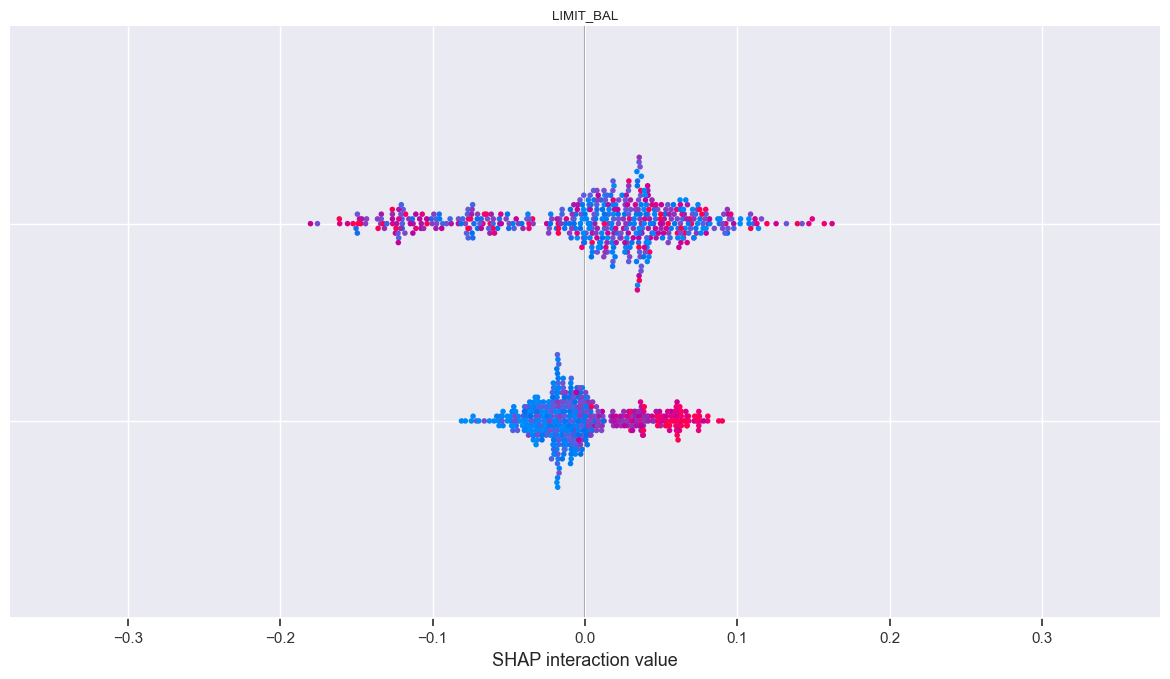

In [32]:
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
X_sample_train_df = pd.DataFrame(X_sample_train, columns=indices)

shap_values = explainer(X_sample_train_df)

shap.summary_plot(shap_values, X_sample_train_df)


### Creating Waterfall Plot

In [33]:
#shap.plots.waterfall(shap_values[0,1])

Unfortunately I was unable to get the waterfall plot to show without throwing an error so I'll just omit this part of the assignment for now because I feel like I have enough data from the table and plot to make some good observations. I want to go to office hours to figure out how I could've made this work, but any feedback would be useful because I'm confused why the plot isn't showing

### **Observations**
#### **Top Features Driving Model Predictions**
1. **AVG_PAYMENT_DELAY (0.316)**  
   - This is the most influential feature, meaning late payments significantly impact the model's predictions.
   - Likely, a higher average delay in payments correlates with a higher probability of default.
  
2. **PAY_BILL_RATIO (0.147) & CREDIT_USAGE_RATIO (0.142)**  
   - These features indicate how well the customer is managing their credit.
   - A high credit usage ratio or bill payment ratio might signal financial distress, leading to a higher chance of default.

3. **RESIDUAL_DEBT_RATIO (0.132)**  
   - This suggests that the proportion of unpaid debt plays a crucial role.
   - Higher residual debt means a lower ability to repay, increasing default risk.

4. **LIMIT_BAL (0.104) & AGE (0.098)**  
   - Credit limit affects borrowing power—those with lower limits may struggle with debt repayment.
   - Age might relate to financial responsibility, with younger individuals possibly showing riskier behaviors.

#### **Lesser Influential Features**
- **EDUCATION (0.026)**  
  - Education level has some effect, but it's minor compared to payment and debt metrics.
  
- **Demographic Factors (MARRIAGE & SEX)**
  - Marriage and sex categories have very low importance (all < 0.01).
  - This implies that marital status and gender do not significantly impact credit risk in this dataset.

---

### **Insights from SHAP Summary Plot**
- The SHAP summary plot shows both positive and negative impacts of features.
- Features such as AVG_PAYMENT_DELAY likely have a direct and strong influence, while features like MARRIAGE_3 or MARRIAGE_0 contribute very little.
- The dense clustering around zero for some features (e.g., MARRIAGE, SEX) indicates minimal impact.
- High dispersion of SHAP values in key features suggests non-linear relationships for instance, some people with high credit usage might still not default if they have strong repayment behavior.

### **Improvements**  

#### **1. Feature Engineering (focusing on the high impact features)**  
- **Debt Burden Index:**  
  - Debt Burden = RESIDUAL_DEBT_RATIO / LIMIT_BAL
  - This metric can highlight individuals whose residual debt is disproportionately high compared to their available credit.  

- **Payment Delay Impact:**  
  - Payment Risk Score = AVG_PAYMENT_DELAY * CREDIT_USAGE_RATIO  
  - This would capture both irresponsibility and overutilization. 

- **Discretization of Continuous Variables:**  
  - Features like AGE and LIMIT_BAL might benefit from binning into categorical groups (e.g., young vs. middle-aged vs. elderly). 
  - This can help detect non-linear patterns more effectively.
  - Can use K Bins descretization


#### **2. Feature Selection**  
Based on the SHAP values, some features contribute very little to the model. Reducing dimensionality can improve efficiency and interpretability.

- **Potentially Removable Features:**  
  - MARRIAGE_3, MARRIAGE_0, SEX_1, SEX_2  
  - These have extremely low importance and may not significantly impact predictions.  


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [34]:
final_model = RandomForestClassifier(
    bootstrap=True, max_depth=50, min_samples_leaf=4, 
    min_samples_split=5, n_estimators=232, random_state=123
)

final_model.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=232, random_state=123)

In [35]:
y_pred = final_model.predict(X_test_processed)
y_pred_proba = final_model.predict_proba(X_test_processed)[:, 1]

In [36]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("Test Scores:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

print("\nComparison with validation scores:")
print(f"Validation F1 Score: {0.4841:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Test Scores:
Accuracy: 0.8043
Precision: 0.5940
Recall: 0.3034
F1 Score: 0.4016

Comparison with validation scores:
Validation F1 Score: 0.4841
Test F1 Score: 0.4016


**Comparison**

1. **F1 Score Comparison**: The F1 score decreased from 0.4841 (validation) to 0.4016 (test), indicating overfitting during optimization.
2. **Accuracy Consistency**: Accuracy stayed consistent between pre-optimization (0.8008) and test (0.8043), but accuracy alone isn't the best metric for imbalanced data.
3. **Precision and Recall Trends**: Precision improved after optimization, but recall decreased, highlighting a focus on precision at the cost of recall.
4. **Before Optimization**: The pre-optimization F1 score (0.4096) is similar to the test F1 score, showing minimal improvement post-optimization.

**Trust in Results**: The test F1 score being lower than the validation F1 score suggests overfitting, and the results should be treated with caution. The model doesn't generalize well to unseen data.

**Optimization Bias**: The higher validation score suggests overfitting, likely due to hyperparameter tuning. There may have been a focus on fitting the validation set too closely which seems plausible because we chose 232 estimators for the model.

In [37]:
preds = model.predict([X_test_processed[0],X_test_processed[2]])
test_pred_1 = X_test.iloc[0]
test_pred_2 = X_test.iloc[2]

print(f"The predictions for row 1 and row 2, respectively, are: {preds}")
print("This would mean row 1 didn't default and row 2 defaulted")

X_test.iloc[[0,2],:]

The predictions for row 1 and row 2, respectively, are: [0 0]
This would mean row 1 didn't default and row 2 defaulted


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
25666    40000.0    2          2         2   26     -1      0      0      0   
22387   170000.0    2          1         2   30      2      2      2      2   

       PAY_5  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID            ...                                                               
25666     -1  ...    1300.0    1000.0       0.0   22373.0     680.0   10000.0   
22387      2  ...    6800.0    6500.0       0.0   13000.0    5500.0    1000.0   

       AVG_PAYMENT_DELAY  PAY_BILL_RATIO  CREDIT_USAGE_RATIO  \
ID                                                             
25666          -0.333333        0.272569            0.540429   
22387           2.000000        0.033717            0.953734   

       RESIDUAL_DEBT_RATIO  
ID                          
25666             0.393125  
22387             0.921577  

[2 rows x 27 columns]

### Prediction Justification
### **Entry 1**
**Why Predicted No Default**:
- Despite a high CREDIT_USAGE_RATIO, the PAY_0 is low, the AVG_PAYMENT_DELAY is favorable, and the PAY_BILL_RATIO suggests that the person is handling their debt responsibly. The LIMIT_BAL being lower might also mean that they have less exposure to risk, especially since they are younger. The model likely predicted no default due to these balanced behaviors.


### **Entry 2**
**Why Predicted Default**:
- The high CREDIT_USAGE_RATIO and RESIDUAL_DEBT_RATIO suggest a heavy reliance on credit and inability to clear debt, which signals a high risk of default. Additionally, the late payment history (PAY_0 to PAY_5) is a clear sign of financial irresponsibility. Despite a high LIMIT_BAL, this individual is showing behaviors that suggest financial strain, which the model heavily weighs in its predictions.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

### Model Metrics

| **Metric**               | **Logistic Regression** | **Decision Tree** | **KNN**       | **SVM**       | **Random Forest** |
|---------------------------|-------------------------|-------------------|---------------|---------------|-------------------|
| **Accuracy**              | 0.7992                 | 0.7129            | 0.7844        | 0.8043        | 0.8008            |
| **Precision**             | 0.6460                 | 0.3481            | 0.5036        | 0.6389        | 0.5712            |
| **Recall**                | 0.1602                 | 0.3742            | 0.2890        | 0.2207        | 0.3193            |
| **F1 Score**              | 0.2567                 | 0.3607            | 0.3673        | 0.3281        | 0.4096            |
| **Fit Time (seconds)**    | N/A                    | 0.1452            | 0.0061        | 5.6128        | 2.3411            |
| **Score Time (seconds)**  | N/A                    | 0.0013            | 0.4080        | 2.9023        | 0.1075            |

---

### Concluding Remarks

1. **Model Performance**:
   - The Random Forest Classifier performed the best overall, achieving the highest F1 score (0.4096) and recall (0.3193). It strikes a balance between precision and recall, making it the most suitable model for this imbalanced dataset.
   - Logistic Regression had the highest precision (0.6460) but the lowest recall (0.1602), indicating it is too conservative in predicting defaults.
   - Decision Tree and KNN showed moderate performance but struggled with recall and precision, respectively.
   - SVM had high precision but very low recall, making it unreliable for this task.

2. **Feature Importance**:
   - The SHAP analysis revealed that `AVG_PAYMENT_DELAY`, `PAY_BILL_RATIO`, and `CREDIT_USAGE_RATIO` are the most influential features. These features align with domain knowledge, as late payments and high credit utilization are strong indicators of default risk.
   - Demographic features like `SEX` and `MARRIAGE` had minimal impact, suggesting they are not strong predictors in this dataset.

3. **Class Imbalance**:
   - The dataset is highly imbalanced, with only ~24% of instances representing defaults. This imbalance affected model performance, particularly recall. Techniques like SMOTE or class weighting could help address this issue.

4. **Hyperparameter Optimization**:
   - Hyperparameter tuning improved the F1 score for both Decision Tree and Random Forest, but the gains were modest. The Random Forest model still shows signs of overfitting, as the test F1 score (0.4016) is lower than the validation F1 score (0.4841).

5. **Interpretability**:
   - SHAP values provided valuable insights into feature contributions, highlighting the importance of payment behavior and credit utilization. This interpretability is crucial for stakeholders to understand and trust the model's predictions.

---

### Other Ideas to Improve Performance/Interpretability

1. **Address Class Imbalance**:
   - Oversampling (SMOTE): Generate synthetic samples of the minority class to balance the dataset.
   - Class Weighting: Assign higher weights to the minority class during model training to penalize misclassifications more heavily.

2. **Advanced Feature Engineering**:
   - Debt Burden Index: Create a new feature like `Debt_Burden = RESIDUAL_DEBT_RATIO / LIMIT_BAL` to capture the proportion of unpaid debt relative to credit limit.
   - Payment Risk Score: Combine `AVG_PAYMENT_DELAY` and `CREDIT_USAGE_RATIO` into a single feature to capture both late payments and overutilization.
   - Binning Continuous Variables: Discretize features like `AGE` and `LIMIT_BAL` into categorical bins to capture non-linear relationships.

3. **Feature Selection**:
   - Revisit RFE with a larger set of features or a different scoring metric (e.g., precision).

4. **Evaluation Metrics**:
   - AUC-PR Curve: Could've focused on the Precision-Recall curve instead of ROC-AUC, as it is more informative for imbalanced datasets.
5. **Data Augmentation**:
   - Synthetic Data Generation: Somehow generate synthetic data for the minority class.
   - External Data: Incorporate external data sources to expand the dataset.

---

### Final Thoughts

While the Random Forest model performed the best among the tested models, there is still room for improvement, particularly in recall and handling class imbalance. Our final testing scores were a 80% accuracy, 0.5940 precision, 0.3034 recall and a 0.4016 F1 score.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised machine learning material is the critical importance of aligning model evaluation with business goals. While technical skills like feature engineering and model tuning are essential, the most interesting part of supervised machine learning lies in solving real-world problems effectively. For example, in our credit card default prediction project, prioritizing recall over accuracy was crucial because missing a defaulter (false negative) is costlier than incorrectly flagging a non-defaulter (false positive). Additionally, feature engineering proved to be a game-changer, as creating meaningful features like `PAY_BILL_RATIO` and `CREDIT_USAGE_RATIO` were significant in making predictions. Ultimately, understanding the problem context and choosing the right evaluation metrics are just as important as the technical aspects of building a model.

<!-- END QUESTION -->

<br><br>

PLEASE READ BEFORE YOU SUBMIT: 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)